In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key='490b57af436351c29b5164048f1f1e7d901b85ce')

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df1 = df.reset_index()['close']

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-25 00:00:00+00:00,97.34,98.84,96.92,98.250,40382921,22.730199,23.080469,22.632123,22.942696,161531684,0.0,1.0
1,AAPL,2016-07-26 00:00:00+00:00,96.67,97.97,96.42,96.820,56239822,22.573745,22.877312,22.515367,22.608772,224959288,0.0,1.0
2,AAPL,2016-07-27 00:00:00+00:00,102.95,104.35,102.75,104.265,92344820,24.040209,24.367128,23.993507,24.347280,369379280,0.0,1.0
3,AAPL,2016-07-28 00:00:00+00:00,104.34,104.45,102.82,102.830,39869839,24.364793,24.390480,24.009853,24.012188,159479356,0.0,1.0
4,AAPL,2016-07-29 00:00:00+00:00,104.21,104.55,103.68,104.190,27733688,24.334436,24.413831,24.210674,24.329766,110934752,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-07-19 00:00:00+00:00,142.45,144.0700,141.67,143.750,121434571,142.45,144.0700,141.67,143.750,121434571,0.0,1.0
1255,AAPL,2021-07-20 00:00:00+00:00,146.15,147.0997,142.96,143.460,96350036,146.15,147.0997,142.96,143.460,96350036,0.0,1.0
1256,AAPL,2021-07-21 00:00:00+00:00,145.40,146.1300,144.63,145.530,74993460,145.40,146.1300,144.63,145.530,74993460,0.0,1.0
1257,AAPL,2021-07-22 00:00:00+00:00,146.80,148.1950,145.81,145.935,77338156,146.80,148.1950,145.81,145.935,77338156,0.0,1.0
1258,AAPL,2021-07-23 00:00:00+00:00,148.56,148.7177,146.92,147.550,71447416,148.56,148.7177,146.92,147.550,71447416,0.0,1.0


In [9]:
df1.shape

(1259,)

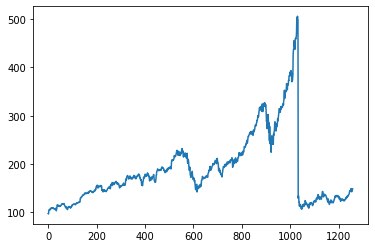

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1259, 1)

In [14]:
df1

array([[0.00163646],
       [0.        ],
       [0.01533877],
       ...,
       [0.11902203],
       [0.1224415 ],
       [0.12674027]])

In [15]:
training_size = int(len(df1)*0.65)
test_size = int(len(df1)-training_size)
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]
len(train_data),len(test_data)

(818, 441)

In [16]:
len(df1)

1259

In [17]:
import numpy as np
def create_dataset(dataset, time_step=1):
  data_x,data_y = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i+time_step, 0])
  return np.array(data_x), np.array(data_y)

In [18]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data, time_step)

In [19]:
x_train.shape, y_train.shape

((717, 100), (717,))

In [20]:
x_test.shape, y_test.shape

((340, 100), (340,))

In [21]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, batch_size= 64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 109ms/step - loss: 0.0086 - val_loss: 0.0365
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0019 - val_loss: 0.0242
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 9.7267e-04 - val_loss: 0.0220
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 6.3621e-04 - val_loss: 0.0204
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 5.0602e-04 - val_loss: 0.0195
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 4.2988e-04 - val_loss: 0.0192
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 4.2598e-04 - val_loss: 0.0188
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 4.2342e-04 - val_loss: 0.0184
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 4.0968e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - l

In [27]:
train_predict= model.predict(x_train)
test_predict = model.predict(x_test)

In [32]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

177.86488491069133

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict))

221.2983835327751

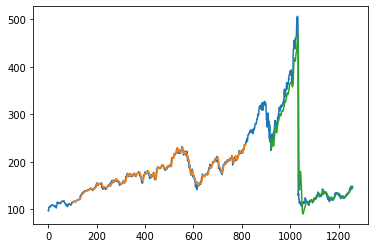

In [33]:
look_back = 100
train_predict_plot = np.empty_like(df1)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back: len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(df1)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1: len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [55]:
len(test_data)

441

In [60]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [61]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.06201455717844756,
 0.05730057154022761,
 0.060451370231058565,
 0.048092423428264364,
 0.05963313956328464,
 0.056934199599433355,
 0.061770309217917985,
 0.0594988031849934,
 0.06672854281666746,
 0.07058766059303401,
 0.06860925211274488,
 0.05827756338234574,
 0.05695862439548627,
 0.06526305505349028,
 0.06318694738898933,
 0.057202872356015844,
 0.0584241121586635,
 0.05993844951394656,
 0.060378095842899715,
 0.05673880123100972,
 0.06223438034292417,
 0.06431048800742512,
 0.07139367886278153,
 0.072150847540423,
 0.0762786380733721,
 0.08228713790239855,
 0.0887230716623516,
 0.08443651995505841,
 0.09222802989595041,
 0.08636607884324166,
 0.09239900346832103,
 0.09156856040252065,
 0.09322944653412146,
 0.0890039568169606,
 0.08995652386302572,
 0.0861462556787651,
 0.09195935713936787,
 0.092936348981486,
 0.09213033071173854,
 0.09015192223144941,
 0.08990767427091984,
 0.08497386546822339,
 0.08761174344194222,
 0.07615651409310731,
 0.07676713399443114,
 0.08077280054

In [64]:
from numpy import array

lst_output=[]
n_steps= 100

i=0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose= 0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0])
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0])
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

0 day input [0.05730057 0.06045137 0.04809242 0.05963314 0.0569342  0.06177031
 0.0594988  0.06672854 0.07058766 0.06860925 0.05827756 0.05695862
 0.06526306 0.06318695 0.05720287 0.05842411 0.05993845 0.0603781
 0.0567388  0.06223438 0.06431049 0.07139368 0.07215085 0.07627864
 0.08228714 0.08872307 0.08443652 0.09222803 0.08636608 0.092399
 0.09156856 0.09322945 0.08900396 0.08995652 0.08614626 0.09195936
 0.09293635 0.09213033 0.09015192 0.08990767 0.08497387 0.08761174
 0.07615651 0.07676713 0.0807728  0.08192077 0.07371403 0.0714181
 0.06374872 0.06912217 0.07517952 0.0722974  0.06882908 0.06843828
 0.07483758 0.07024571 0.07432465 0.07383616 0.07371403 0.06987934
 0.06824288 0.06743686 0.069342   0.06562943 0.07136925 0.07139368
 0.07344536 0.07439793 0.0719066  0.07493527 0.08258024 0.08052855
 0.08177422 0.08577988 0.08253139 0.08702555 0.09112891 0.09044502
 0.0897367  0.08900396 0.0930829  0.09686874 0.0984075  0.09916467
 0.10573494 0.11076645 0.11699477 0.11374628 0.1183137

In [66]:
day_new = np.arange(1,101)
day_pred= np.arange(101,131)

In [67]:
len(df1)

1259

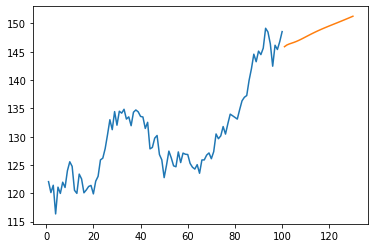

In [68]:
plt.plot(day_new, scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

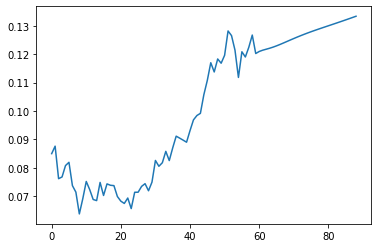

In [69]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])